## Network Visualization using networkx and Plotly

by Siavash Mortezavi



## To run this notebook on your maching enter your username and api-key under imports for plotly to begin

## Imports

In [1]:
import plotly.plotly as py
from plotly.graph_objs import *


In [2]:
import plotly
# Create an account with plotly and make a useranme and get api key
plotly.tools.set_credentials_file(username='username', api_key='your key')

In [3]:
import matplotlib.pyplot as plt
import pylab
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from random import choice
import scipy as sp
import networkx as nx


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Function

In [4]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = plt.figure(figsize=(5, 5)) # in inches
    plt.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = plt.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

In [5]:
def create_graph_and_adjacancy_matrix(X, threshhold):
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            if np.linalg.norm(X[i] - X[j]) > threshhold:
                continue
            else:
                g.add_weighted_edges_from([(i,j,np.linalg.norm(X[i] - X[j]))])

##  Create a graph add nodes and edges and display adjacency matrix

In [6]:
# Create my graph object
G = nx.Graph()

In [7]:
# I can add a single node 
G.add_node(1)

In [8]:
G.nodes()

[1]

In [9]:
# or multiple nodes
G.add_nodes_from([2, 5, 4])

In [10]:
G.nodes()

[1, 2, 5, 4]

In [11]:
# add a single edge without weights

G.add_edge(1,5)

In [12]:
# add a singled edge with weights

G.add_edge(3,5,weight =.1)

In [13]:
# Look at the adjacency matrix
print(nx.adjacency_matrix(G))

  (0, 2)	1.0
  (2, 0)	1.0
  (2, 4)	0.1
  (4, 2)	0.1


In [14]:
# add multiple edges , nodes and weights

G.add_weighted_edges_from([(1, 2, .3), (2, 7, .6), (3, 5, .7)])

In [15]:
# Look at the adjacency matrix
print(nx.adjacency_matrix(G))

  (0, 1)	0.3
  (0, 2)	1.0
  (1, 0)	0.3
  (1, 5)	0.6
  (2, 0)	1.0
  (2, 4)	0.7
  (4, 2)	0.7
  (5, 1)	0.6


## visualize adjacency matrix

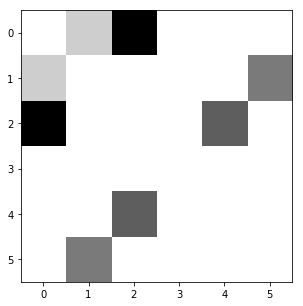

In [16]:
draw_adjacency_matrix(G)

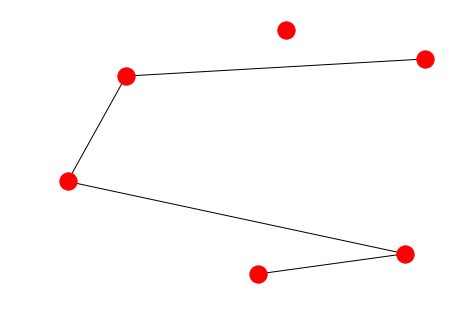

In [17]:
# visualize the Network

nx.draw(G)

## Visualize a graph generated from CSV files Using Plotly

To demonstrate this I will use the Iris data set. 

## Data

In [18]:
iris = datasets.load_iris()

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
X = iris.data
y = iris.target

## Create the network and Graph the adjacency matrix and the Network

In [22]:
# Crete an empty graph

g = nx.Graph()

In [23]:
# populates the graph and its weights using L2 distance with threshold .4
# Each node is an observation from our dataset. 
create_graph_and_adjacancy_matrix(X, .4)

In [24]:
# Creates adjancy matrix
adj_matrix  = nx.adjacency_matrix(g)

In [25]:
# The adjacecny Matrix
print(adj_matrix)

  (0, 0)	0.0
  (0, 1)	0.1414213562373093
  (0, 2)	0.17320508075688762
  (0, 3)	0.37416573867739483
  (0, 4)	0.3741657386773941
  (0, 5)	0.09999999999999998
  (0, 6)	0.33166247903553986
  (0, 7)	0.30000000000000016
  (0, 8)	0.316227766016838
  (0, 9)	0.14142135623730995
  (0, 10)	0.14142135623730995
  (0, 11)	0.3872983346207423
  (0, 12)	0.37416573867739383
  (0, 13)	0.14142135623730964
  (0, 14)	0.17320508075688743
  (0, 15)	0.3605551275463989
  (0, 16)	0.30000000000000027
  (0, 17)	0.22360679774997896
  (1, 0)	0.1414213562373093
  (1, 1)	0.0
  (1, 2)	0.22360679774997916
  (1, 4)	0.3464101615137758
  (1, 5)	0.17320508075688756
  (1, 6)	0.26457513110645875
  (1, 7)	0.264575131106459
  :	:
  (138, 139)	0.2449489742783171
  (139, 131)	0.3000000000000001
  (139, 138)	0.2449489742783171
  (139, 139)	0.0
  (140, 140)	0.0
  (141, 141)	0.0
  (142, 142)	0.0
  (143, 111)	0.30000000000000016
  (143, 119)	0.3999999999999999
  (143, 121)	0.24494897427831785
  (143, 122)	0.31622776601683794
  (143, 

## Visualize Adjacency Matrix

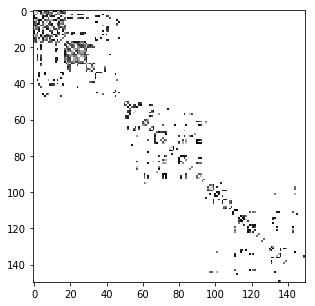

In [26]:
# The adjacency matrix visualized 
draw_adjacency_matrix(g)

## First let's get a quickview of the network using matplotlib

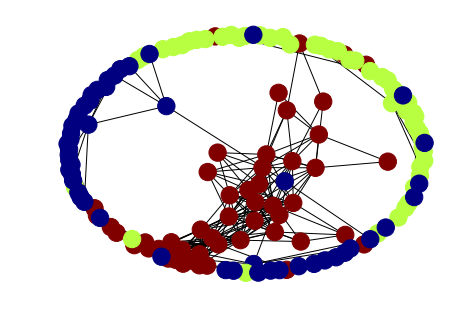

In [27]:
# color map Each color represents a species
val_map = {0: 1.0,
           1: 0.5714285714285714,
           2: 0.0}

values = [val_map.get(y[node], 0.25) for node in g.nodes()]


nx.draw(g, cmap=plt.get_cmap('jet'), node_color=values)

plt.show()

** We can Clearly see that there is some form of clustering happening but let's visualize this much better using Plotly **

## Visualizing a network using Plotly

In [28]:
# get the data
data = y

# create a location for all the nodes
pos = nx.fruchterman_reingold_layout(g)
 
# create position attribute for each node    
nx.set_node_attributes(g, 'pos', pos)
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

p=nx.single_source_shortest_path_length(g,ncenter)

In [29]:
label_map = {0: 'setosa',
           1: 'versicolor',
           2: 'virginica'}

labels = [label_map.get(data[node]) for node in g.nodes()]

In [30]:
edge_trace = Scatter(
    x=[],
    y=[],
    line=Line(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in g.edges():
    x0, y0 = g.node[edge[0]]['pos']
    x1, y1 = g.node[edge[1]]['pos']
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

node_trace = Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=Marker(
        showscale=True,
        reversescale=True,
        color=[],
        size=20,
        colorbar=dict(
            thickness=3,
            title='target type',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in g.nodes():
    x, y = g.node[node]['pos']
    node_trace['x'].append(x)
    node_trace['y'].append(y)

In [31]:
for node, adjacencies in enumerate(g.adjacency_list()):
    node_trace['marker']['color'].append(values[node])
    node_info = '# of connections: '+str(len(adjacencies))
    node_trace['text'].append(node_info)

In [32]:
fig = Figure(data=Data([edge_trace, node_trace]),
             layout=Layout(
                title='<br>Network graph of Iris dataset',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=10,l=5,r=5,t=40),
                annotations=
                 [ dict(
                    text="By: Siavash Mortezavi",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False)))

py.iplot(fig, filename='networkx')

** It's seems like doing a simple l2 distance between data sets groups similar flower types together **

## Extra Network Analysis

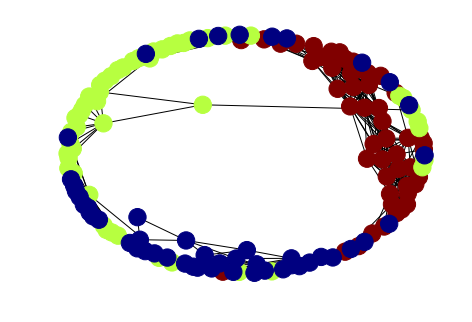

Network density: 0.052527964205816555
This low density implies that this is a sparse network

Transitivity: 0.6306569343065693
This is higher than usual implying connected components

connected: False
This is not a connected graph further analysis will be needed to identify connected components

Network diameter of largest component: 8
This data is pretty globally seperated

Triadic closure: 0.6306569343065693



In [33]:
val_map = {0: 1.0,
           1: 0.5714285714285714,
           2: 0.0}

values = [val_map.get(data[node], 0.25) for node in g.nodes()]


nx.draw(g, cmap=plt.get_cmap('jet'), node_color=values)

plt.show()


density = nx.density(g)
print("Network density:", density)
print("This low density implies that this is a sparse network")
print("")
print('Transitivity:', nx.transitivity(g))
print('This is higher than usual implying connected components')
print("")
# If your Graph has more than one component, this will return False:
print('connected:',nx.is_connected(g))
print('This is not a connected graph further analysis will be needed to identify connected components')
print("")
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(g)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = g.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)
print("This data is pretty globally seperated")
print("")
triadic_closure = nx.transitivity(g)
print("Triadic closure:", triadic_closure)
print("")